# Life Expectancy Minimum in Ukraine

In [18]:
%matplotlib inline

In [19]:
import io
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
plt.rcParams['figure.figsize'] = (16, 8)
sns.set()

We will use the table *Life expectancy (years)* from http://www.gapminder.org/data/ to perform analysis of life expectancy in Ukraine during 30s by comparison with a few other countries.

> Gapminder is an independent Swedish foundation with no political, religious or economic affiliations. Gapminder is a fact tank, not a think tank. Gapminder fights devastating misconceptions about global development. Gapminder produces free teaching resources making the world understandable based on reliable statistics. Gapminder promotes a fact-based worldview everyone can understand.  Gapminder collaborates with universities, UN, public agencies and non-governmental organizations. All Gapminder activities are governed by the board. We do not award grants. Gapminder Foundation is registered at Stockholm County Administration Board. Our constitution can be found here.

The data set along with its description can be found by the [Google Drive link](https://docs.google.com/spreadsheets/d/1H3nzTwbn8z4lJ5gJ_WfDgCeGEXK3PVGcNjQ_U5og8eo/pub#).

In [7]:
r = requests.get('https://docs.google.com/spreadsheets/d/1H3nzTwbn8z4lJ5gJ_WfDgCeGEXK3PVGcNjQ_U5og8eo/pub?output=csv')
data = io.StringIO(r.content.decode("utf-8"))

In [8]:
life_frame = pd.read_csv(data, index_col=0)

In [12]:
life_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, Abkhazia to South Sudan
Columns: 217 entries, 1800 to 2016
dtypes: float64(217)
memory usage: 442.8+ KB


There are 260 countries (some of them historical or internationally unrecognized) with the life expectancy statistics by year from 1800 to 2016. We are interested to compare a few countries only:

* **Ukraine** - the country in focus
* **Russia, Belarus, Poland** - neighboring slavic countries from East, North, and West. All of them historically "owned" parts of Ukraine land and population in different periods of time.
* **Kazakhstan** - a country which was also a colony of Russia, and also one of the main targets of femine inspired by the government of the USSR in 30s.
* **Germany** - Western Europe country which greatly suffered from losses during WWI, WWII and from depression of 20s in-between.

In [13]:
countries_of_interest = ['Ukraine', 'Russia', 'Poland', 'Belarus', 'Kazakhstan', 'Germany']

In [34]:
df = life_frame.loc[countries_of_interest, :].T
df.index = pd.to_datetime(df.index)

First, we have a look at the entire timeline where the statistical data are available.

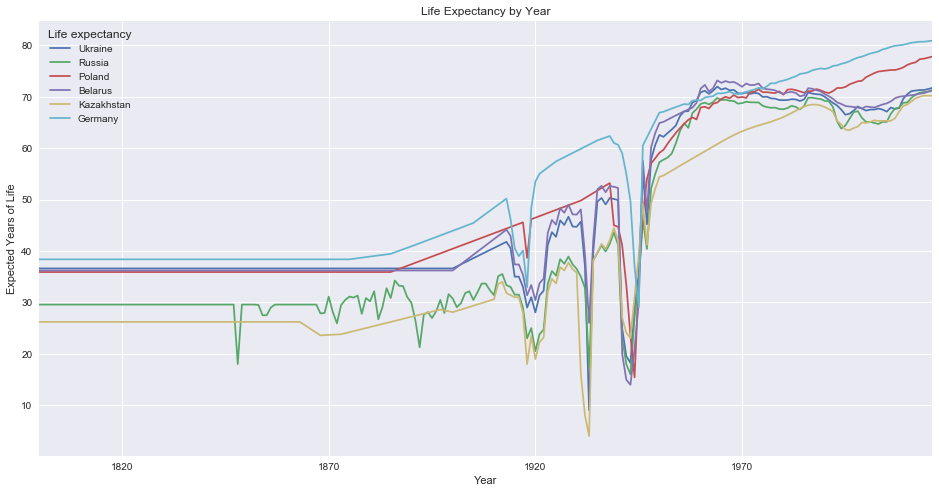

In [58]:
_ = df.plot.line(title='Life Expectancy by Year')
plt.xlabel('Year')
plt.ylabel('Expected Years of Life')
plt.show()

We can make a few observations looking at the graphs for the selected countries:

* The general life expectancy trend has been to grow for all countries.
* Germany, Poland, Ukraine, and Belarus had close life expectancies for the entire 19th century.
* Russia and Kazakhstan were close enough for that period of time.
* There were three strong downfalls for Russia, Belarus, Ukraine, Kazakhstan and only two for Germany and Poland between the start of WWI and the end of WWII.
* The lowest life expectancy of all recorded time for Ukraine and Kazakhstan falls on the peacetime.

Let's now zoom in the years of the lowest life expectancy.

In [85]:
min_ua_life = df['Ukraine'].min()
min_ua_life_year = df['Ukraine'].idxmin()
ua_annotation = 'Ukraine: minimum of {0} expected years of life in year {1:%Y}'.format(min_ua_life, min_ua_life_year)

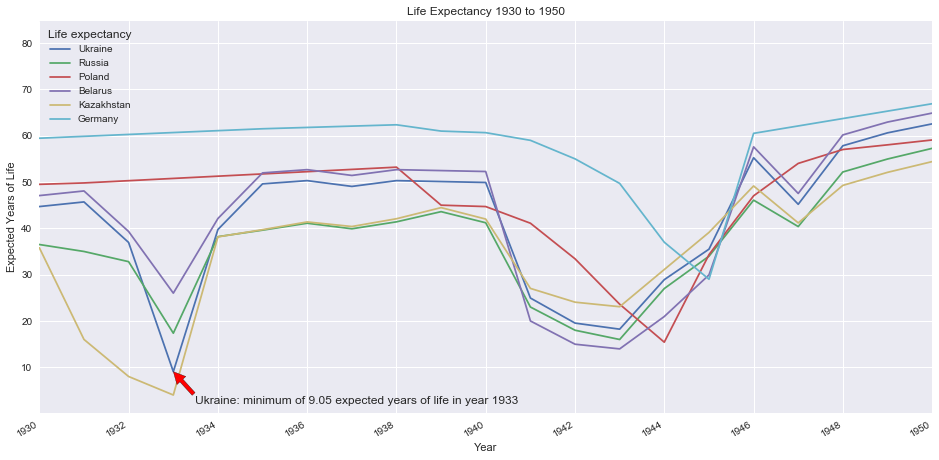

In [86]:
_ = df.plot.line(title='Life Expectancy 1930 to 1950', x_compat=True)
plt.xlabel('Year')
plt.ylabel('Expected Years of Life')
plt.xlim(['1930', '1950'])
plt.annotate(
    ua_annotation, xy=(min_ua_life_year, min_ua_life), 
    xytext=(min_ua_life_year + pd.DateOffset(months=6), min_ua_life - 7),
    arrowprops=dict(facecolor='red'))
plt.show()

We can clearly see that life expectancy in Ukraine was only 9 years in year 1933, lower than it was during the next war, lower than any selected country's life expectancy during the war. It was second lowest to Kazakhstan only. Belarus and Russia had local minimums that year as well, but those minimums were still twice as high. Poland, which included large part of western Ukraine did not have any fluctuations at all.

Natural causes cannot explain so steep fall of the life expectancy in Ukraine or Kazakhstan since the agricultural conditions, medical care, and similar were considerably worse in the 19th century still not causing comparable losses, esp. for Ukraine.

The only reason can be an act of intentional and targeted mass killing of Ukrainian and Kazakh populations wielding the power of the (Soviet) government. Which, of course, we know from other sources, was indeed the case.

The following table provides the life expectancy for 6 year range around year 1933.

In [64]:
df.loc['1930':'1935']

Life expectancy,Ukraine,Russia,Poland,Belarus,Kazakhstan,Germany
1930-01-01,44.70,36.50,49.50,47.07,35.79,59.46
1931-01-01,45.70,35.00,49.80,48.07,16.00,59.87
1932-01-01,36.95,32.80,50.29,39.32,8.00,60.28
1933-01-01,9.05,17.35,50.77,26.00,4.00,60.68
1934-01-01,39.75,38.20,51.26,42.12,38.15,61.09
1935-01-01,49.60,39.60,51.75,51.97,39.71,61.50
